In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train=pd.read_csv('Train_ODI_Participants_Data.csv')
test=pd.read_csv('Test_ODI_Participants_Data.csv')

In [3]:
train.head()

,Team1,Team2,Stadium,HostCountry,Team1_Venue,Team2_Venue,Team1_Innings,Team2_Innings,MonthOfMatch,MatchWinner
0,5,4,37,4,Home,Away,Second,First,Dec,4
1,1,14,84,7,Neutral,Neutral,First,Second,Sep,1
2,9,15,47,9,Home,Away,First,Second,Feb,9
3,7,2,102,6,Home,Away,First,Second,Aug,2
4,6,8,46,5,Home,Away,First,Second,Aug,6


In [4]:
test.head()

,Team1,Team2,Stadium,HostCountry,Team1_Venue,Team2_Venue,Team1_Innings,Team2_Innings,MonthOfMatch
0,2,4,34,1,Home,Away,First,Second,Oct
1,14,1,19,15,Home,Away,First,Second,Mar
2,9,10,130,14,Neutral,Neutral,Second,First,Dec
3,9,10,8,9,Home,Away,First,Second,Dec
4,5,15,130,14,Neutral,Neutral,First,Second,Oct


In [5]:
train.MatchWinner.value_counts()

1     379
5     318
10    316
14    262
13    246
12    245
4     237
9     223
15     87
2      70
6      33
0      27
7      24
11     18
8      15
3       8
Name: MatchWinner, dtype: int64

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2508 entries, 0 to 2507
Data columns (total 10 columns):
Team1            2508 non-null int64
Team2            2508 non-null int64
Stadium          2508 non-null int64
HostCountry      2508 non-null int64
Team1_Venue      2508 non-null object
Team2_Venue      2508 non-null object
Team1_Innings    2508 non-null object
Team2_Innings    2508 non-null object
MonthOfMatch     2508 non-null object
MatchWinner      2508 non-null int64
dtypes: int64(5), object(5)
memory usage: 196.0+ KB


In [7]:
train.describe()

,Team1,Team2,Stadium,HostCountry,MatchWinner
count,2508.000000,2508.000000,2508.000000,2508.000000,2508.000000
mean,7.274322,9.179426,73.502791,7.572568,7.991627
std,4.635982,4.574049,43.936337,5.594166,4.694191
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,5.000000,36.000000,3.000000,4.000000
50%,6.500000,10.000000,71.000000,9.000000,9.000000
75%,12.000000,13.000000,111.000000,13.000000,12.000000
max,15.000000,15.000000,151.000000,16.000000,15.000000


In [3]:
y=train['MatchWinner']
train.drop('MatchWinner',axis=1,inplace=True)

In [4]:
from sklearn import preprocessing
lbl_enc = preprocessing.LabelEncoder()
y = lbl_enc.fit_transform(y.values)

In [5]:
df=pd.concat([train,test],axis=0)

In [6]:
df=pd.get_dummies(df,drop_first=True)

In [12]:
df.head()

,Team1,Team2,Stadium,HostCountry,Team1_Venue_Home,Team1_Venue_Neutral,Team2_Venue_Home,Team2_Venue_Neutral,Team1_Innings_Second,Team2_Innings_Second,...,MonthOfMatch_Dec,MonthOfMatch_Feb,MonthOfMatch_Jan,MonthOfMatch_Jul,MonthOfMatch_Jun,MonthOfMatch_Mar,MonthOfMatch_May,MonthOfMatch_Nov,MonthOfMatch_Oct,MonthOfMatch_Sep
0,5,4,37,4,1,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
1,1,14,84,7,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
2,9,15,47,9,1,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
3,7,2,102,6,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,6,8,46,5,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [13]:
train.shape   ,   test.shape   , df.shape

((2508, 9), (1075, 9), (3583, 21))

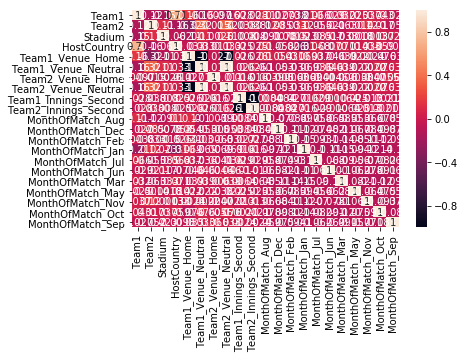

In [14]:
sns.heatmap(df.corr(),annot=True)

In [7]:
df_train=df.iloc[:2508,:]
df_test=df.iloc[2508:,:]

In [8]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
ros=RandomOverSampler()
x_ros,y_ros=ros.fit_sample(df_train,y)
print('Original dataset shape %s' % Counter(y_ros))

Using TensorFlow backend.
C:\Users\hp\Anaconda3\3.7\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\hp\Anaconda3\3.7\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\hp\Anaconda3\3.7\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\hp\Anaconda3\3.7\lib\site-packages\tensorflow\python\framework\dtype

Original dataset shape Counter({4: 379, 1: 379, 9: 379, 2: 379, 6: 379, 5: 379, 13: 379, 14: 379, 10: 379, 12: 379, 15: 379, 3: 379, 0: 379, 7: 379, 11: 379, 8: 379})


In [54]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_ros=sc.fit_transform(x_ros)
df_test=sc.fit_transform(df_test)

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
x_train,x_cv,y_train,y_cv=train_test_split(x_ros,y_ros,stratify=y_ros,random_state=1234)

In [78]:
import catboost
from catboost import CatBoostClassifier
cb=CatBoostClassifier(max_bin=100)
cb.fit(x_train,y_train)
cb_cv=cb.predict_proba(x_cv)
print(log_loss(y_cv,cb_cv))

Learning rate set to 0.085481
0:	learn: 2.6034917	total: 38.2ms	remaining: 38.2s
1:	learn: 2.4652130	total: 63.6ms	remaining: 31.8s
2:	learn: 2.3596269	total: 96.6ms	remaining: 32.1s
3:	learn: 2.2807100	total: 122ms	remaining: 30.4s
4:	learn: 2.1937265	total: 147ms	remaining: 29.2s
5:	learn: 2.1231083	total: 178ms	remaining: 29.4s
6:	learn: 2.0497735	total: 227ms	remaining: 32.2s
7:	learn: 1.9831453	total: 279ms	remaining: 34.5s
8:	learn: 1.9329266	total: 305ms	remaining: 33.6s
9:	learn: 1.8756957	total: 331ms	remaining: 32.8s
10:	learn: 1.8270418	total: 358ms	remaining: 32.2s
11:	learn: 1.7923864	total: 402ms	remaining: 33.1s
12:	learn: 1.7614950	total: 452ms	remaining: 34.3s
13:	learn: 1.7171075	total: 548ms	remaining: 38.6s
14:	learn: 1.6790722	total: 633ms	remaining: 41.5s
15:	learn: 1.6401285	total: 657ms	remaining: 40.4s
16:	learn: 1.6100384	total: 683ms	remaining: 39.5s
17:	learn: 1.5717457	total: 709ms	remaining: 38.7s
18:	learn: 1.5465878	total: 736ms	remaining: 38s
19:	learn:

160:	learn: 0.4836686	total: 8.08s	remaining: 42.1s
161:	learn: 0.4812191	total: 8.14s	remaining: 42.1s
162:	learn: 0.4794277	total: 8.17s	remaining: 42s
163:	learn: 0.4772987	total: 8.21s	remaining: 41.8s
164:	learn: 0.4760269	total: 8.23s	remaining: 41.7s
165:	learn: 0.4742452	total: 8.26s	remaining: 41.5s
166:	learn: 0.4724569	total: 8.29s	remaining: 41.3s
167:	learn: 0.4705916	total: 8.4s	remaining: 41.6s
168:	learn: 0.4680020	total: 8.44s	remaining: 41.5s
169:	learn: 0.4666951	total: 8.47s	remaining: 41.4s
170:	learn: 0.4643110	total: 8.51s	remaining: 41.3s
171:	learn: 0.4630805	total: 8.59s	remaining: 41.4s
172:	learn: 0.4614190	total: 8.63s	remaining: 41.3s
173:	learn: 0.4597606	total: 8.66s	remaining: 41.1s
174:	learn: 0.4586088	total: 8.74s	remaining: 41.2s
175:	learn: 0.4575245	total: 8.78s	remaining: 41.1s
176:	learn: 0.4561450	total: 8.83s	remaining: 41.1s
177:	learn: 0.4548003	total: 8.9s	remaining: 41.1s
178:	learn: 0.4534318	total: 8.94s	remaining: 41s
179:	learn: 0.4516

320:	learn: 0.3200633	total: 15.7s	remaining: 33.2s
321:	learn: 0.3194795	total: 15.8s	remaining: 33.2s
322:	learn: 0.3189042	total: 15.9s	remaining: 33.3s
323:	learn: 0.3181713	total: 16s	remaining: 33.3s
324:	learn: 0.3176418	total: 16s	remaining: 33.3s
325:	learn: 0.3173617	total: 16.1s	remaining: 33.2s
326:	learn: 0.3168713	total: 16.1s	remaining: 33.2s
327:	learn: 0.3162759	total: 16.2s	remaining: 33.3s
328:	learn: 0.3158172	total: 16.4s	remaining: 33.4s
329:	learn: 0.3153053	total: 16.6s	remaining: 33.7s
330:	learn: 0.3146343	total: 16.7s	remaining: 33.8s
331:	learn: 0.3142001	total: 16.8s	remaining: 33.9s
332:	learn: 0.3137466	total: 16.9s	remaining: 33.9s
333:	learn: 0.3132560	total: 17s	remaining: 33.9s
334:	learn: 0.3128344	total: 17.1s	remaining: 34s
335:	learn: 0.3121488	total: 17.1s	remaining: 33.9s
336:	learn: 0.3115109	total: 17.2s	remaining: 33.9s
337:	learn: 0.3109774	total: 17.3s	remaining: 33.9s
338:	learn: 0.3105309	total: 17.4s	remaining: 34s
339:	learn: 0.3100469	

481:	learn: 0.2576009	total: 25.8s	remaining: 27.7s
482:	learn: 0.2572034	total: 25.8s	remaining: 27.7s
483:	learn: 0.2569286	total: 25.9s	remaining: 27.6s
484:	learn: 0.2566670	total: 25.9s	remaining: 27.5s
485:	learn: 0.2564455	total: 26s	remaining: 27.5s
486:	learn: 0.2562294	total: 26s	remaining: 27.4s
487:	learn: 0.2560041	total: 26s	remaining: 27.3s
488:	learn: 0.2558238	total: 26.1s	remaining: 27.3s
489:	learn: 0.2556091	total: 26.2s	remaining: 27.3s
490:	learn: 0.2553574	total: 26.2s	remaining: 27.2s
491:	learn: 0.2551540	total: 26.3s	remaining: 27.1s
492:	learn: 0.2549595	total: 26.3s	remaining: 27.1s
493:	learn: 0.2546714	total: 26.4s	remaining: 27s
494:	learn: 0.2543273	total: 26.4s	remaining: 26.9s
495:	learn: 0.2540231	total: 26.4s	remaining: 26.9s
496:	learn: 0.2538395	total: 26.5s	remaining: 26.8s
497:	learn: 0.2535272	total: 26.5s	remaining: 26.7s
498:	learn: 0.2531806	total: 26.6s	remaining: 26.7s
499:	learn: 0.2529584	total: 26.6s	remaining: 26.6s
500:	learn: 0.252672

644:	learn: 0.2225848	total: 32.6s	remaining: 17.9s
645:	learn: 0.2224234	total: 32.6s	remaining: 17.9s
646:	learn: 0.2222557	total: 32.7s	remaining: 17.8s
647:	learn: 0.2221167	total: 32.7s	remaining: 17.8s
648:	learn: 0.2219590	total: 32.7s	remaining: 17.7s
649:	learn: 0.2218060	total: 32.7s	remaining: 17.6s
650:	learn: 0.2216545	total: 32.8s	remaining: 17.6s
651:	learn: 0.2214991	total: 32.8s	remaining: 17.5s
652:	learn: 0.2213411	total: 32.8s	remaining: 17.4s
653:	learn: 0.2212267	total: 32.9s	remaining: 17.4s
654:	learn: 0.2210647	total: 32.9s	remaining: 17.3s
655:	learn: 0.2208960	total: 32.9s	remaining: 17.3s
656:	learn: 0.2207863	total: 33s	remaining: 17.2s
657:	learn: 0.2206600	total: 33.1s	remaining: 17.2s
658:	learn: 0.2203907	total: 33.1s	remaining: 17.1s
659:	learn: 0.2203019	total: 33.1s	remaining: 17.1s
660:	learn: 0.2201316	total: 33.1s	remaining: 17s
661:	learn: 0.2199199	total: 33.2s	remaining: 16.9s
662:	learn: 0.2197822	total: 33.2s	remaining: 16.9s
663:	learn: 0.21

807:	learn: 0.2003802	total: 38s	remaining: 9.02s
808:	learn: 0.2002857	total: 38s	remaining: 8.98s
809:	learn: 0.2001707	total: 38s	remaining: 8.92s
810:	learn: 0.2001145	total: 38.1s	remaining: 8.87s
811:	learn: 0.1999742	total: 38.1s	remaining: 8.82s
812:	learn: 0.1998427	total: 38.1s	remaining: 8.77s
813:	learn: 0.1997602	total: 38.2s	remaining: 8.72s
814:	learn: 0.1996882	total: 38.2s	remaining: 8.67s
815:	learn: 0.1995420	total: 38.2s	remaining: 8.62s
816:	learn: 0.1994592	total: 38.2s	remaining: 8.57s
817:	learn: 0.1993902	total: 38.3s	remaining: 8.52s
818:	learn: 0.1992998	total: 38.3s	remaining: 8.46s
819:	learn: 0.1991694	total: 38.3s	remaining: 8.41s
820:	learn: 0.1990504	total: 38.4s	remaining: 8.37s
821:	learn: 0.1989706	total: 38.4s	remaining: 8.31s
822:	learn: 0.1988460	total: 38.4s	remaining: 8.26s
823:	learn: 0.1987323	total: 38.4s	remaining: 8.21s
824:	learn: 0.1985981	total: 38.5s	remaining: 8.16s
825:	learn: 0.1984689	total: 38.6s	remaining: 8.12s
826:	learn: 0.1983

968:	learn: 0.1851372	total: 43.6s	remaining: 1.4s
969:	learn: 0.1850623	total: 43.7s	remaining: 1.35s
970:	learn: 0.1849181	total: 43.7s	remaining: 1.31s
971:	learn: 0.1848635	total: 43.8s	remaining: 1.26s
972:	learn: 0.1847876	total: 43.8s	remaining: 1.22s
973:	learn: 0.1847098	total: 43.8s	remaining: 1.17s
974:	learn: 0.1846567	total: 43.8s	remaining: 1.12s
975:	learn: 0.1845780	total: 43.9s	remaining: 1.08s
976:	learn: 0.1844605	total: 43.9s	remaining: 1.03s
977:	learn: 0.1843689	total: 43.9s	remaining: 988ms
978:	learn: 0.1842767	total: 44s	remaining: 943ms
979:	learn: 0.1841949	total: 44s	remaining: 898ms
980:	learn: 0.1841427	total: 44s	remaining: 852ms
981:	learn: 0.1840492	total: 44s	remaining: 807ms
982:	learn: 0.1839308	total: 44.1s	remaining: 762ms
983:	learn: 0.1838407	total: 44.1s	remaining: 717ms
984:	learn: 0.1837751	total: 44.1s	remaining: 672ms
985:	learn: 0.1836972	total: 44.2s	remaining: 627ms
986:	learn: 0.1836413	total: 44.2s	remaining: 582ms
987:	learn: 0.1835788

In [27]:
cb_pred=cb.predict_proba(df_test)

In [62]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()
gb.fit(x_train,y_train)
gb_cv=gb.predict_proba(x_cv)
print(log_loss(y_cv,gb_cv))

RecursionError: maximum recursion depth exceeded

In [63]:
gb_pred=gb.predict_proba(df_test)

In [18]:
import gc
gc.collect()

1219

In [55]:
xgb_params = {'learning_rate': 0.05, 
              'max_depth': 3,
              'subsample': 0.9,        
              'colsample_bytree': 0.9,
              'objective': 'multisofmax',
              'silent': 1, 
              'n_estimators':100, 
              'gamma':1,
              'max_delts_step':2,
              'min_child_weight':4} 

In [72]:
import xgboost
from xgboost import XGBClassifier
xgb=XGBClassifier(max_depth=7)
xgb.fit(x_train,y_train)
xgb_cv=xgb.predict_proba(x_cv)
print(log_loss(y_cv,xgb_cv))

0.3638611202601879


In [73]:
xgb_pred=xgb.predict_proba(df_test)

In [50]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(max_depth=18)
rf.fit(x_train,y_train)
rf_cv=rf.predict_proba(x_cv)
print(log_loss(y_cv,rf_cv))

0.5249428975216448


In [51]:
rf_pred=rf.predict_proba(df_test)

In [59]:
def blend_models_predict(X):
    return (0.4 * (xgb.predict_proba(X)) + (0.2 * rf.predict_proba(X))  + (0.4 * gb.predict_proba(X)))

In [60]:
def log_loss(Y, y_pred):
    return (log_loss(Y, y_pred))

In [61]:
blended_predictions = (blend_models_predict(df_test))

NameError: name 'gb' is not defined

In [51]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
my_pipeline = make_pipeline(SimpleImputer(), LGBMClassifier(max_depth=-1,learning_rate=0.08))

In [52]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
scores = cross_val_score(my_pipeline,x_train, y_train,cv=10, scoring='accuracy')
print(scores)

[0.82637363 0.82637363 0.85494505 0.83956044 0.83076923 0.84395604
 0.81318681 0.81978022 0.82378855 0.81277533]


In [53]:
my_pipeline.fit(x_train,y_train)
my_pipeline_cv=my_pipeline.predict_proba(x_cv)
print(log_loss(y_cv,my_pipeline_cv))

0.36859370052961254


In [74]:
sample=pd.DataFrame(xgb_pred)

In [75]:
sample.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.001708,0.002932,0.872437,0.011246,0.046555,0.025111,0.003123,0.006043,0.002364,0.011702,0.002437,0.002287,0.002339,0.004330,0.001908,0.003479
1,0.928135,0.000908,0.000233,0.000113,0.000277,0.000329,0.000296,0.000135,0.000120,0.000187,0.000184,0.000124,0.000240,0.068452,0.000103,0.000164
2,0.000813,0.001299,0.000867,0.000833,0.001333,0.002134,0.001524,0.001175,0.440924,0.537299,0.003915,0.001699,0.002359,0.001652,0.000967,0.001207
3,0.001380,0.002154,0.001625,0.002436,0.002390,0.004953,0.003554,0.002851,0.185276,0.763009,0.008995,0.009780,0.003042,0.002878,0.001729,0.003948
4,0.000399,0.000848,0.000426,0.000409,0.000677,0.310986,0.000542,0.000568,0.000583,0.002093,0.002723,0.000665,0.001255,0.001979,0.675276,0.000572


In [76]:
sample.to_excel("xgb_md_7_sc.xls",index=False)

In [32]:
import lightgbm
from lightgbm import LGBMClassifier
lgb=LGBMClassifier(max_depth=-1,learning_rate=0.08)
lgb.fit(x_train,y_train)
lgb_cv=lgb.predict_proba(x_cv)
print(log_loss(y_cv,lgb_cv))

0.36859370052961254


In [33]:
lgb_pred=lgb.predict_proba(df_test)